# SLIC implementation:

__Author__: Kunal Rathore \
__Date__:  May 20th 2022

__Aim__: This notebook includes implementation for Simple Linear Iterative Clustering (SLIC), utilizing and distinguishing two different libraries/packages in Python. 

__Thoughts__: *This implementation might be specific to my knowledge and relevance to certain problem statament, make sure to go through the original paper in case of doubt. 

__Observations__: The image plots here, shows the difference between implementation of the same algorithm, which includes different parameters.

### References:
- https://www.cs.jhu.edu/~ayuille/JHUcourses/VisionAsBayesianInference2020/4/s/Achanta_SLIC_PAMI2012.pdf
- https://stackoverflow.com/questions/57039504/what-is-the-difference-between-opencv-ximgproc-slic-and-skimage-segmentation-sli
- https://pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
- https://docs.opencv.org/3.4/df/d6c/group__ximgproc__superpixel.html
- image data source: https://cocodataset.org/

In [ ]:
# !pip install scikit-image
# !pip install opencv-contrib-python

In [4]:
import os
import cv2
import numpy as np
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('images/DC.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

print(img.shape)


(480, 640, 3)


In [5]:
### using scikit learn slic
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

def get_slic(img, numSegments, show_img = False):
    segments = slic(img, n_segments = numSegments, sigma = 3, start_label=1)
    print("No. of segments generated: ",np.max(segments))
    if show_img:
        fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(14,6))
        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(mark_boundaries(img, segments, color=(0, 1, 0)))
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.imshow(segments, cmap='turbo')
        plt.axis("off")
        # show the plots
        plt.show()
    return segments

def get_slic_cv(img, region_size = 40 , ruler =  20.0, show_img = False):
    #Initialize the slic item, the average superpixel size is 20 (default is 10), and the smoothing factor is 20 
    slic = cv2.ximgproc.createSuperpixelSLIC( img , region_size = region_size , ruler = ruler)  
    slic.iterate(30)      
    mask_slic = slic.getLabelContourMask( )  #Get Mask, super pixel edge Mask==1 
    label_slic = slic.getLabels( )         # Get the superpixel tag 
    number_slic = slic.getNumberOfSuperpixels()   # obtain super pixel number 
    print(f"Number of clusters: {number_slic}")
    mask_inv_slic = cv2.bitwise_not(mask_slic) 
    img_slic = cv2.bitwise_and( img , img , mask = mask_inv_slic )  # drawn over the pixel boundary on the original 
    if show_img:
        fig = plt.figure("Superpixels -- %d segments",figsize=(14,6))
        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(img_slic)
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.imshow(label_slic, cmap='turbo')
        plt.axis("off")
        # show the plots
        plt.show()
    return label_slic
    

No. of segments generated:  83


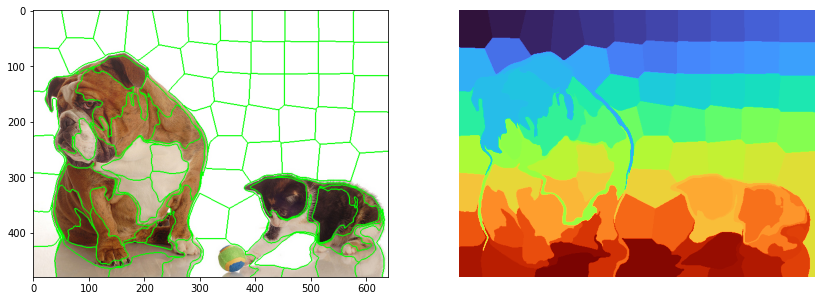

In [6]:
label_slic = get_slic(img, numSegments = 99, show_img = True)

Number of clusters: 125


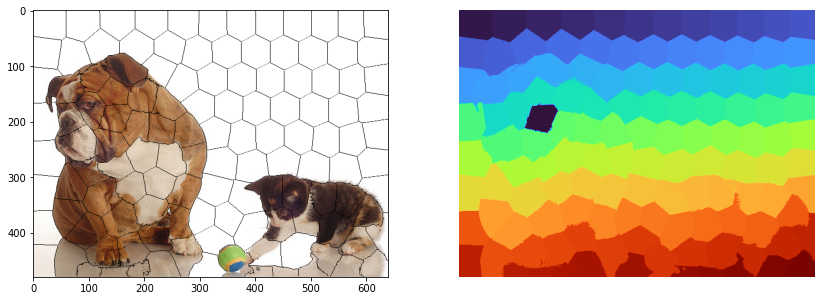

In [7]:
label_slic_cv = get_slic_cv(img, region_size = 50, show_img = True)

000000005529.jpg
No. of segments generated:  77


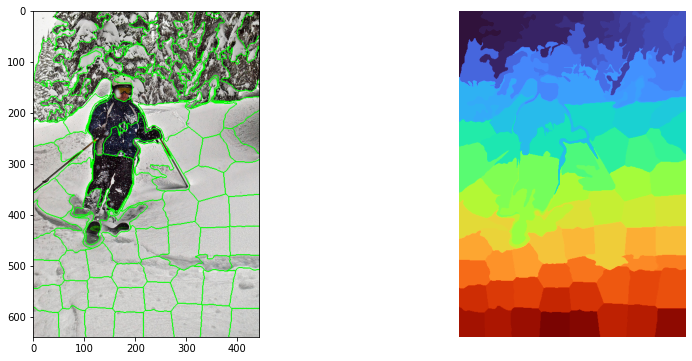

Number of clusters: 111


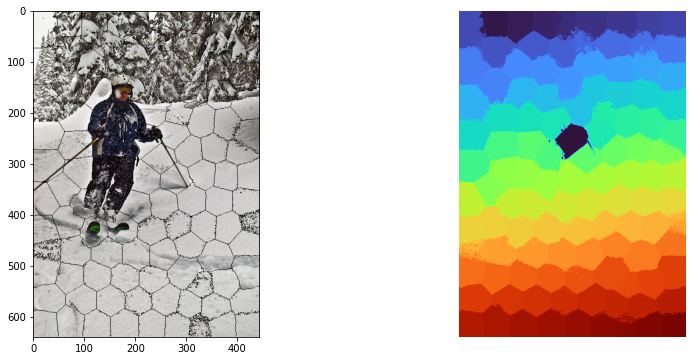

-----------------------------------------------------------------

000000009378.jpg
No. of segments generated:  70


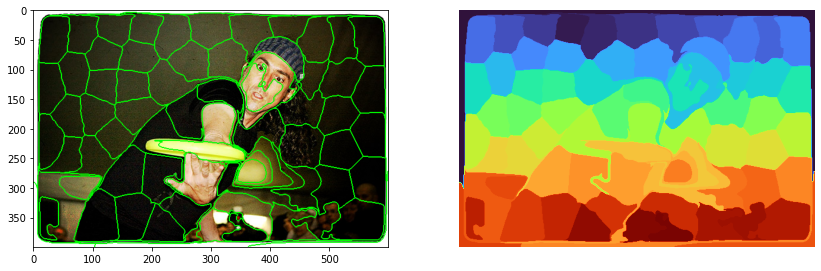

Number of clusters: 92


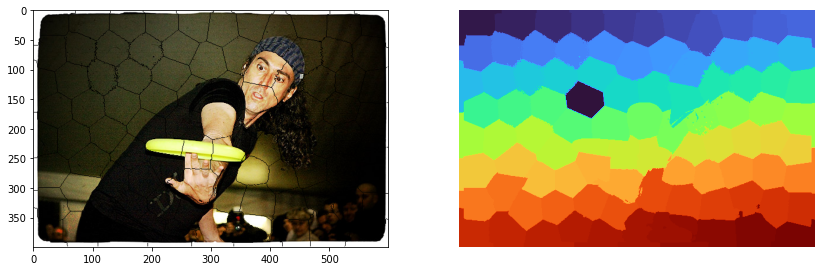

-----------------------------------------------------------------

000000011051.jpg
No. of segments generated:  75


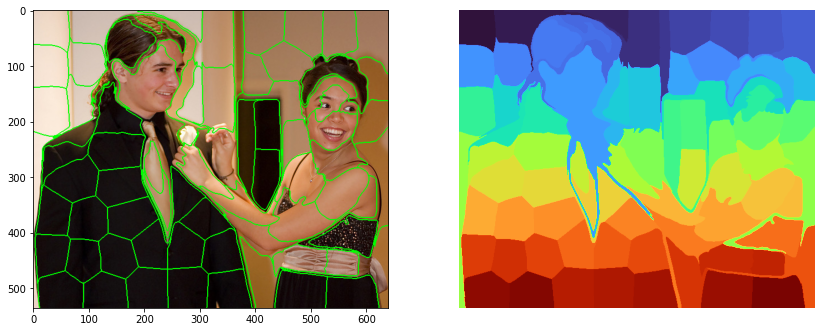

Number of clusters: 138


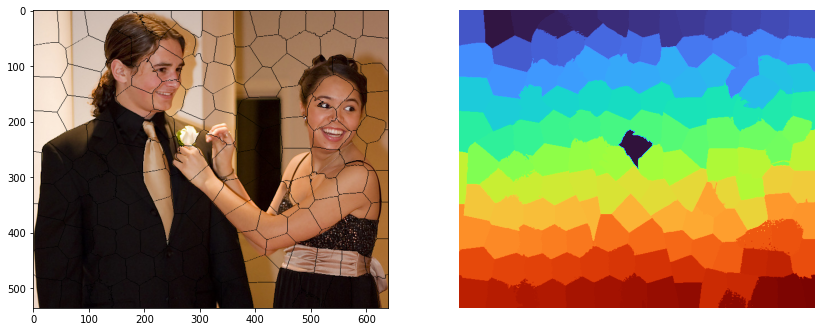

-----------------------------------------------------------------

COCO_test2014_000000001650.jpg
No. of segments generated:  86


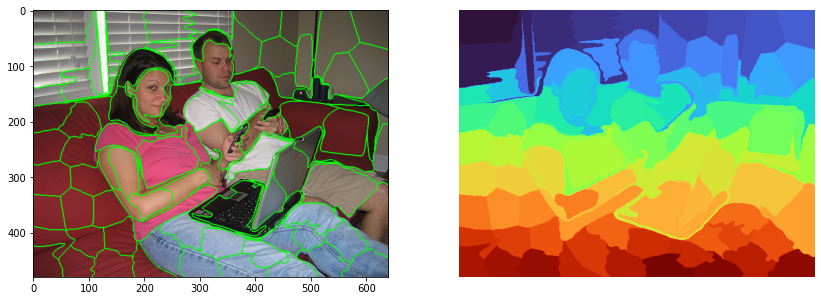

Number of clusters: 125


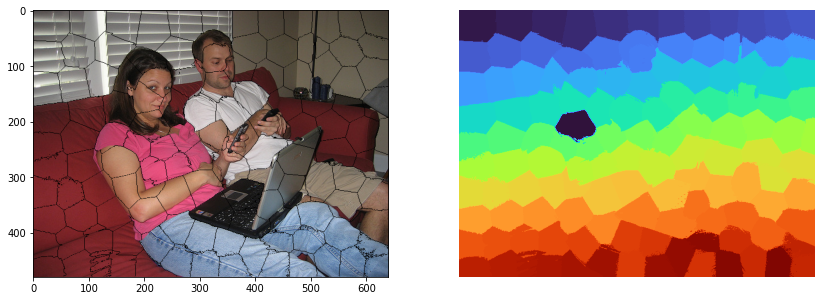

-----------------------------------------------------------------

COCO_test2014_000000005497.jpg
No. of segments generated:  96


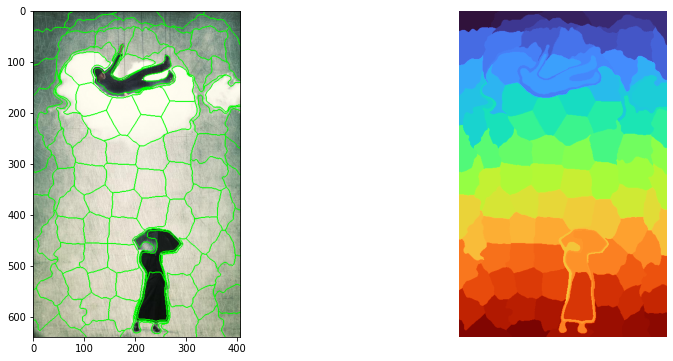

Number of clusters: 104


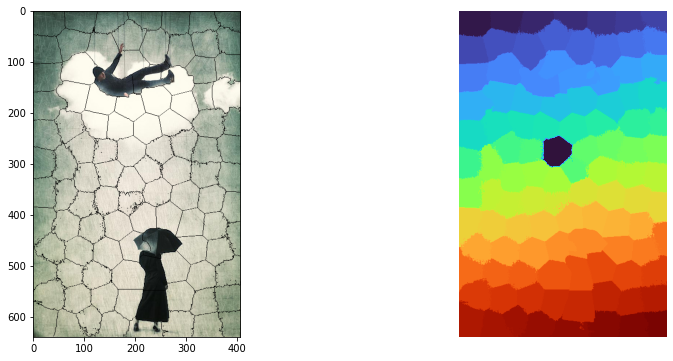

-----------------------------------------------------------------

DC.jpg
No. of segments generated:  83


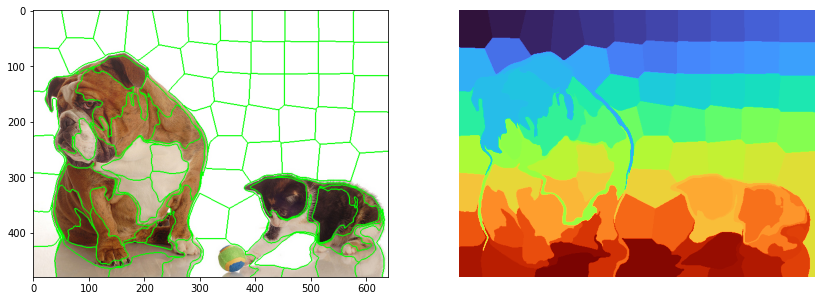

Number of clusters: 125


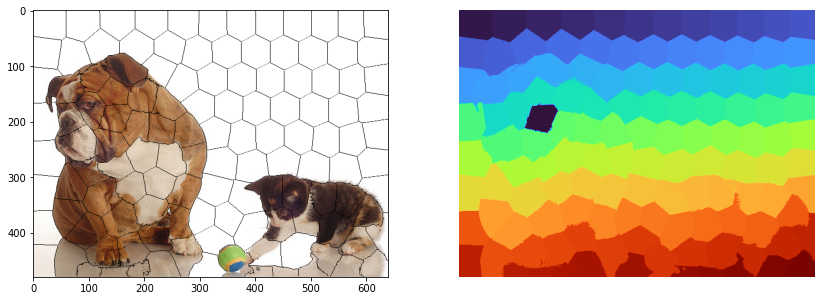

-----------------------------------------------------------------

image10.jpg
No. of segments generated:  81


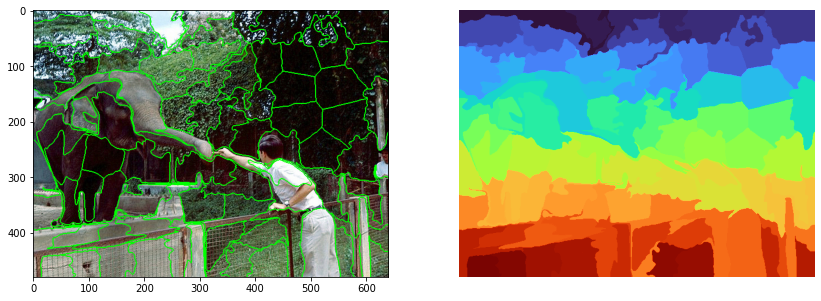

Number of clusters: 125


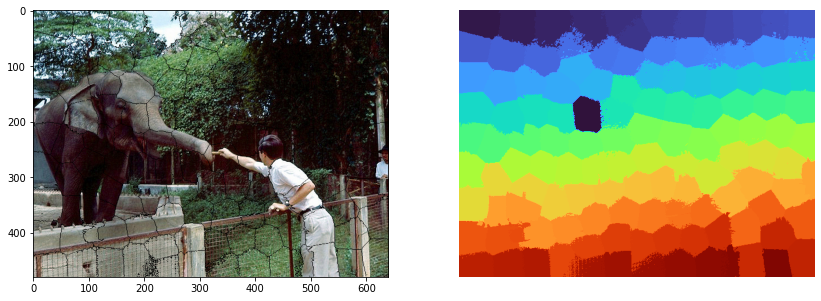

-----------------------------------------------------------------

image11.jpg
No. of segments generated:  87


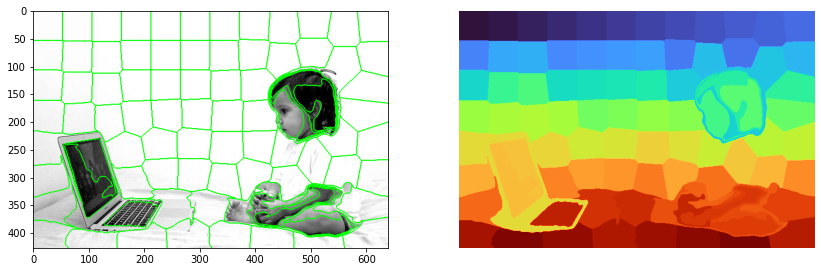

Number of clusters: 113


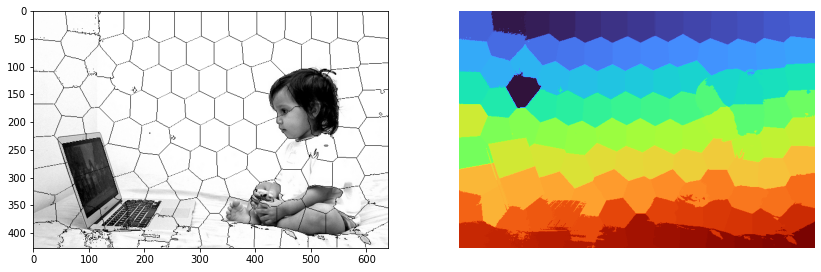

-----------------------------------------------------------------

image6.jpg
No. of segments generated:  81


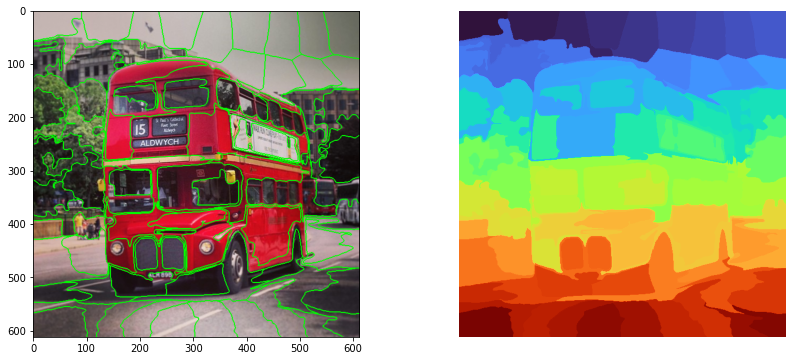

Number of clusters: 144


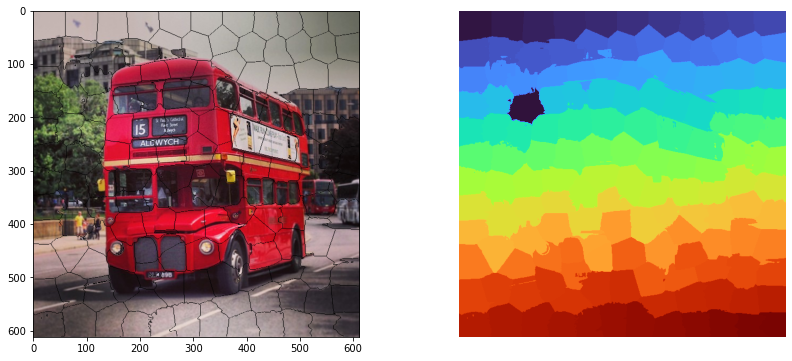

-----------------------------------------------------------------



In [8]:
for img_name in os.listdir("images/"):
    
    #plot both the slic ouputs:
    print(img_name)
    img = cv2.imread(f'images/{img_name}')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    label_slic = get_slic(img, numSegments = 99, show_img = True)
    label_slic_cv = get_slic_cv(img, region_size = 50, show_img = True)
    print("-----------------------------------------------------------------\n")